# 복습!

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)
iris_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5] 

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

##### 원본으로 분류

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.9

##### PCA로 분류

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)


In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9

In [27]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

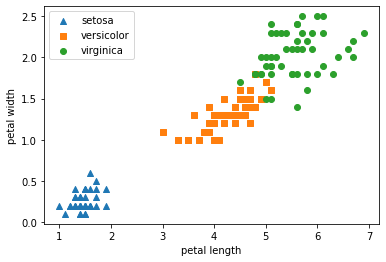

In [32]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.species == i]['petal length (cm)']
    y_axis_data = df[df.species == i]['petal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker
    ,label = iris.target_names[i])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [34]:
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,-2.389842,0.646835


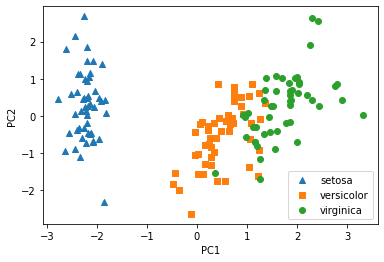

In [37]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.species == i]['PC1']
    y_axis_data = df[df.species == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
